In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_text_seq.csv')
df_em = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_emoticon.csv')

In [6]:
df.head()

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


In [7]:
t=4
print(df['input_str'][t])
print(df_em['input_emoticon'][t])

00046418994221543620690159661426247612621596614284
🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼


In [50]:
df.head()

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


In [51]:
df_em.head()

,input_emoticon,label
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,0
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,0
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,0
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,1
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,1


In [9]:
import pandas as pd
from collections import Counter

 
emoji_column = df_em['input_emoticon']   
all_emojis = [emoji for sequence in emoji_column for emoji in sequence]
emoji_counts = Counter(all_emojis)
unique_emojis = set(all_emojis)

print(f"Number of unique emojis: {len(unique_emojis)}")
print(f"Unique emojis: {unique_emojis}")


Number of unique emojis: 214
Unique emojis: {'🙛', '🙅', '🚸', '🙔', '🚘', '🛇', '🙥', '🙼', '😊', '😜', '😎', '😱', '🚌', '🛎', '🙪', '🚍', '🙹', '🚠', '🚐', '🚮', '🙟', '🙙', '🙸', '🚇', '😦', '😼', '🙐', '🛍', '🚗', '🚅', '🙊', '🚢', '🚁', '😧', '🚄', '🛈', '🛂', '🛑', '😰', '🙑', '🙳', '🚔', '🚎', '😙', '🚿', '😔', '😨', '🚆', '🚉', '🚀', '🙚', '🛒', '🚝', '😾', '🙇', '😯', '😖', '🚞', '🙤', '🚤', '🙲', '🚙', '🙍', '🚺', '\U0001f6d9', '🙶', '🚑', '🙷', '🙜', '🙢', '🚪', '😲', '😩', '🛋', '🚖', '🚕', '😘', '🛡', '🚨', '🚼', '😒', '🚹', '🛞', '🙈', '🛖', '🙽', '🙨', '🛝', '🙱', '🙿', '🙓', '🚫', '🙋', '🚟', '😏', '🚴', '😣', '😝', '🚓', '😑', '🛀', '😚', '🚵', '😡', '😁', '🙆', '🙗', '😪', '🛆', '🚭', '🙘', '🙩', '😛', '😄', '🚡', '🛉', '🛏', '🛟', '😃', '🙴', '😇', '🙞', '😸', '🙻', '🚏', '😺', '🚳', '🛔', '😹', '🛄', '🙉', '\U0001f6d8', '🛕', '🙀', '🚥', '🚒', '🙎', '🚯', '😷', '🛁', '🚋', '🚚', '🙏', '😮', '🙖', '🙰', '🚃', '🙁', '😤', '\U0001f6db', '🚊', '🛜', '🛊', '🙕', '🛐', '😬', '🛌', '😅', '😴', '🚽', '🚱', '🛓', '🚈', '😭', '😶', '🚣', '😥', '😠', '🛅', '😞', '😻', '🙌', '🙣', '🚶', '🚲', '😕', '🙠', '😓', '🚂', '😋', '🚩', '🚾', '🙒', '😳', '🙮', '🙄'

In [8]:
 
def split_into_chunks(input_str, chunk_size=1):
    return [input_str[i:i+chunk_size] for i in range(0, len(input_str), chunk_size)]
 
chunks_df = df['input_str'].apply(split_into_chunks).apply(pd.Series)
chunks_df.columns = [f'chunk_{i+1}' for i in range(chunks_df.shape[1])]
df = pd.concat([df, chunks_df], axis=1)
df.head()

,input_str,label,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6,chunk_7,chunk_8,...,chunk_41,chunk_42,chunk_43,chunk_44,chunk_45,chunk_46,chunk_47,chunk_48,chunk_49,chunk_50
0,0000154364642718159661428002624223132284159626...,0,0,0,0,0,1,5,4,3,...,1,5,9,6,2,6,2,6,1,4
1,0004641596369515436422262614110471596262476161...,0,0,0,0,4,6,4,1,5,...,4,7,6,1,6,1,4,2,8,4
2,0001543626215965999614422464135806142624051159...,0,0,0,0,1,5,4,3,6,...,0,5,1,1,5,9,6,2,8,4
3,0000154364224641238614262159689561596284351061...,1,0,0,0,0,1,5,4,3,...,3,5,1,0,6,1,4,2,6,2
4,0004641899422154362069015966142624761262159661...,1,0,0,0,4,6,4,1,8,...,1,5,9,6,6,1,4,2,8,4


In [10]:
df = df.drop('input_str', axis=1)


In [11]:
df

,label,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6,chunk_7,chunk_8,chunk_9,...,chunk_41,chunk_42,chunk_43,chunk_44,chunk_45,chunk_46,chunk_47,chunk_48,chunk_49,chunk_50
0,0,0,0,0,0,1,5,4,3,6,...,1,5,9,6,2,6,2,6,1,4
1,0,0,0,0,4,6,4,1,5,9,...,4,7,6,1,6,1,4,2,8,4
2,0,0,0,0,1,5,4,3,6,2,...,0,5,1,1,5,9,6,2,8,4
3,1,0,0,0,0,1,5,4,3,6,...,3,5,1,0,6,1,4,2,6,2
4,1,0,0,0,4,6,4,1,8,9,...,1,5,9,6,6,1,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,1,0,0,0,0,0,2,6,2,6,...,1,4,1,5,9,6,2,4,1,4
7076,1,0,0,0,0,4,6,4,4,2,...,6,1,4,3,9,0,1,2,6,2
7077,1,0,0,0,3,0,6,9,9,1,...,2,6,2,6,1,4,1,5,9,6
7078,0,0,0,0,0,6,1,4,1,5,...,6,9,4,0,6,1,4,2,8,4


In [37]:
df_valid = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/valid/valid_text_seq.csv')
df_valid.head()
def split_into_chunks(input_str, chunk_size=1):
    return [input_str[i:i+chunk_size] for i in range(0, len(input_str), chunk_size)]

chunks_df_valid = df_valid['input_str'].apply(split_into_chunks).apply(pd.Series)
chunks_df_valid.columns = [f'chunk_{i+1}' for i in range(chunks_df_valid.shape[1])]
df_valid = pd.concat([df_valid, chunks_df_valid], axis=1)



In [38]:

df_valid = df_valid.drop('input_str', axis=1)
df_valid.head()

,label,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6,chunk_7,chunk_8,chunk_9,...,chunk_41,chunk_42,chunk_43,chunk_44,chunk_45,chunk_46,chunk_47,chunk_48,chunk_49,chunk_50
0,1,0,0,0,4,2,2,1,5,4,...,6,1,4,2,6,2,3,9,0,1
1,1,0,0,0,4,6,4,6,1,4,...,6,1,4,2,8,4,3,1,0,4
2,0,0,0,0,4,2,2,4,6,4,...,1,5,9,6,2,8,4,6,1,4
3,0,0,0,0,0,1,5,4,3,6,...,2,6,2,2,8,4,1,5,9,6
4,1,0,0,0,3,3,2,4,1,5,...,2,8,4,1,5,9,6,2,6,2


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = df.drop('label', axis=1)
y = df['label']
X_vlid = df_valid.drop('label', axis=1)
y_valid = df_valid['label'] 
dt = RandomForestClassifier(n_estimators=200,random_state=42)
dt.fit(X, y) 
y_pred = dt.predict(X_vlid)
 
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

df_one_hot = pd.get_dummies(df, columns=df.columns[1:])
df_valid_one_hot = pd.get_dummies(df_valid, columns=df_valid.columns[1:])   
 
X = df_one_hot.drop('label', axis=1)
y = df_one_hot['label']

X_valid = df_valid_one_hot.drop('label', axis=1)
y_valid = df_valid_one_hot['label']  
X = X[X_valid.columns]


 

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X, y)
y_pred = model.predict(X_valid)

# Evaluate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6667


/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

df_one_hot = pd.get_dummies(df, columns=df.columns[1:])
df_valid_one_hot = pd.get_dummies(df_valid, columns=df_valid.columns[1:])   
 
X = df_one_hot.drop('label', axis=1)
y = df_one_hot['label']

X_valid = df_valid_one_hot.drop('label', axis=1)
y_valid = df_valid_one_hot['label']  
X = X[X_valid.columns]


 
model = RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(X, y)
y_pred = model.predict(X_valid)
# model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# model.fit(X, y)
# y_pred = model.predict(X_valid)

# Evaluate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6339


In [12]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


X = df_one_hot.drop('label', axis=1)
y = df_one_hot['label']

 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)
 

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = NeuralNetwork(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")
     

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor).squeeze()
    y_pred = (y_pred_tensor.numpy() > 0.5).astype(int)
    accuracy = (y_pred == y_test).mean()
    print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/50, Loss: 0.6829
Epoch 2/50, Loss: 0.6972
Epoch 3/50, Loss: 0.7690
Epoch 4/50, Loss: 0.6859
Epoch 5/50, Loss: 0.6950
Epoch 6/50, Loss: 0.6935
Epoch 7/50, Loss: 0.6029
Epoch 8/50, Loss: 0.7783
Epoch 9/50, Loss: 0.7966
Epoch 10/50, Loss: 0.6310
Epoch 11/50, Loss: 0.6003
Epoch 12/50, Loss: 0.5338
Epoch 13/50, Loss: 0.4948
Epoch 14/50, Loss: 0.4509
Epoch 15/50, Loss: 2.1944
Epoch 16/50, Loss: 0.2945
Epoch 17/50, Loss: 0.4949
Epoch 18/50, Loss: 0.4968
Epoch 19/50, Loss: 0.2952
Epoch 20/50, Loss: 0.7083
Epoch 21/50, Loss: 0.9543
Epoch 22/50, Loss: 0.8512
Epoch 23/50, Loss: 0.4873
Epoch 24/50, Loss: 0.4794
Epoch 25/50, Loss: 0.2863
Epoch 26/50, Loss: 0.3746
Epoch 27/50, Loss: 0.7652
Epoch 28/50, Loss: 0.2736
Epoch 29/50, Loss: 0.4941
Epoch 30/50, Loss: 0.2509
Epoch 31/50, Loss: 0.2404
Epoch 32/50, Loss: 0.5756
Epoch 33/50, Loss: 0.3623
Epoch 34/50, Loss: 0.3582
Epoch 35/50, Loss: 0.4806
Epoch 36/50, Loss: 0.4523
Epoch 37/50, Loss: 0.3924
Epoch 38/50, Loss: 0.3114
Epoch 39/50, Loss: 0.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = df.drop('label', axis=1)
y = df['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the SVC model
svc = SVC(kernel='poly',degree=10)
svc.fit(X_train, y_train)

# Predict on the test set
y_pred = svc.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.51


In [184]:
df = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_text_seq.csv')

In [185]:
df.head()

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


In [186]:
df['input_str'] = '0'+df['input_str']

In [187]:
def split_into_chunks(input_str, chunk_size=3):
    return [input_str[i:i+chunk_size] for i in range(0, len(input_str), chunk_size)]

chunks_df = df['input_str'].apply(split_into_chunks).apply(pd.Series)
chunks_df.columns = [f'chunk_{i+1}' for i in range(chunks_df.shape[1])]
df = pd.concat([df, chunks_df], axis=1)

In [188]:
df = df.drop('input_str', axis=1)

In [189]:
correlation_matrix = df.corr()
correlation_matrix

,label,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6,chunk_7,chunk_8,chunk_9,chunk_10,chunk_11,chunk_12,chunk_13,chunk_14,chunk_15,chunk_16,chunk_17
label,1.000000,NaN,-0.000654,-0.016274,-0.000984,-0.025546,-0.018826,-0.012300,-0.015915,-0.006451,-0.040013,-0.026942,-0.012431,-0.028086,0.018951,0.013515,-0.003684,-0.001972
chunk_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chunk_2,-0.000654,NaN,1.000000,-0.166717,0.046839,0.009562,0.021228,0.010544,-0.006250,-0.013229,0.005539,-0.005863,0.001871,0.002732,0.012694,-0.007142,-0.009196,-0.014210
chunk_3,-0.016274,NaN,-0.166717,1.000000,-0.062937,0.014363,-0.008349,-0.006461,-0.020267,-0.040183,-0.021452,0.018697,-0.047368,-0.008835,-0.015289,0.012640,0.019874,0.004548
chunk_4,-0.000984,NaN,0.046839,-0.062937,1.000000,-0.070060,0.027654,0.017198,-0.019266,-0.031389,-0.011303,0.019145,0.003931,-0.014949,-0.003814,0.003656,0.000011,0.009980
chunk_5,-0.025546,NaN,0.009562,0.014363,-0.070060,1.000000,-0.071896,0.008494,-0.010322,-0.007320,-0.004897,-0.003847,-0.019742,-0.007422,-0.001048,0.005542,0.005425,0.004129
chunk_6,-0.018826,NaN,0.021228,-0.008349,0.027654,-0.071896,1.000000,-0.068527,-0.004017,-0.010296,-0.005443,-0.002111,-0.040122,-0.009213,-0.015575,0.009076,0.010231,0.001879
chunk_7,-0.012300,NaN,0.010544,-0.006461,0.017198,0.008494,-0.068527,1.000000,-0.077923,-0.001599,-0.004732,0.005904,-0.030522,0.014935,-0.008488,-0.002095,-0.007283,0.017203
chunk_8,-0.015915,NaN,-0.006250,-0.020267,-0.019266,-0.010322,-0.004017,-0.077923,1.000000,-0.082671,-0.008346,0.012316,-0.010177,0.001344,0.020104,0.008014,0.005882,-0.001525
chunk_9,-0.006451,NaN,-0.013229,-0.040183,-0.031389,-0.007320,-0.010296,-0.001599,-0.082671,1.000000,-0.127441,0.042654,-0.033925,-0.012289,-0.010153,-0.012931,-0.003326,0.025914


In [190]:
df

,label,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6,chunk_7,chunk_8,chunk_9,chunk_10,chunk_11,chunk_12,chunk_13,chunk_14,chunk_15,chunk_16,chunk_17
0,0,000,001,543,646,427,181,596,614,280,026,242,231,322,841,596,262,614
1,0,000,046,415,963,695,154,364,222,626,141,104,715,962,624,761,614,284
2,0,000,015,436,262,159,659,996,144,224,641,358,061,426,240,511,596,284
3,1,000,001,543,642,246,412,386,142,621,596,895,615,962,843,510,614,262
4,1,000,046,418,994,221,543,620,690,159,661,426,247,612,621,596,614,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,1,000,000,262,670,271,815,966,144,641,543,642,228,426,261,415,962,414
7076,1,000,004,644,221,558,262,614,334,915,436,159,615,962,846,143,901,262
7077,1,000,030,699,159,643,091,543,661,426,246,442,228,417,952,626,141,596
7078,0,000,006,141,596,154,361,983,464,262,422,377,582,621,596,940,614,284


In [191]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])
df.head()

,label,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6,chunk_7,chunk_8,chunk_9,chunk_10,chunk_11,chunk_12,chunk_13,chunk_14,chunk_15,chunk_16,chunk_17
0,0,0.0,-0.861491,0.303248,0.834468,-0.048498,-1.072391,0.665244,0.737814,-0.737627,-1.858293,-0.768499,-0.981899,-0.696121,1.054777,0.176590,-0.999463,0.773170
1,0,0.0,1.573273,-0.226110,2.209356,1.132734,-1.187475,-0.316592,-0.947319,0.757484,-1.345211,-1.398166,1.302742,1.609058,0.305856,0.763162,0.364382,-0.866749
2,0,0.0,-0.104009,-0.139262,-0.831011,-1.229730,0.965035,2.358064,-1.282626,-0.979610,0.885579,-0.239213,-1.784356,-0.321529,-1.019422,-0.125583,0.294640,-0.866749
3,1,0.0,-0.861491,0.303248,0.817119,-0.846270,-0.087777,-0.223487,-1.291224,0.735879,0.684808,2.211013,0.830709,1.609058,1.061679,-0.129138,0.364382,-0.976077
4,1,0.0,1.573273,-0.213703,2.343808,-0.956460,0.470597,0.766813,1.064524,-1.260484,0.974811,0.071057,-0.906374,0.348413,0.295503,0.176590,0.364382,-0.866749


In [193]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
 
X = df.drop('label', axis=1)
y = df['label']

forest = RandomForestClassifier(n_estimators=200, random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
 
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

     Feature  Importance
7    chunk_8    0.070549
6    chunk_7    0.070081
5    chunk_6    0.068511
8    chunk_9    0.068131
4    chunk_5    0.067572
2    chunk_3    0.066579
3    chunk_4    0.065984
12  chunk_13    0.064161
9   chunk_10    0.063349
13  chunk_14    0.061985
11  chunk_12    0.061884
14  chunk_15    0.061116
10  chunk_11    0.060670
15  chunk_16    0.058713
16  chunk_17    0.045465
1    chunk_2    0.045251
0    chunk_1    0.000000


In [194]:
df_valid = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/valid/valid_text_seq.csv')

def split_into_chunks(input_str, chunk_size=3):
    return [input_str[i:i+chunk_size] for i in range(0, len(input_str), chunk_size)]

df_valid['input_str'] = '0'+df_valid['input_str']
chunks_df_valid = df_valid['input_str'].apply(split_into_chunks).apply(pd.Series)
chunks_df_valid.columns = [f'chunk_{i+1}' for i in range(chunks_df_valid.shape[1])]

df_valid = pd.concat([df_valid, chunks_df_valid], axis=1)

df_valid = df_valid.drop('input_str', axis=1)
df_valid[df_valid.columns[1:]] = scaler.fit_transform(df_valid[df_valid.columns[1:]])



In [197]:
from sklearn.naive_bayes import GaussianNB

top_10_features = feature_importances.head(10)
X = df[top_10_features['Feature']]
y = df['label']
X_valid = df_valid[top_10_features['Feature']]
y_valid = df_valid['label'] 

forest = GaussianNB()
forest.fit(X, y)
X_valid = X_valid[X.columns] 
y_pred = forest.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.51


In [206]:
X_train_tensor = torch.tensor(X.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_valid.values, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

# Initialize the model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]  # Ensure input_dim matches the number of features
model = NeuralNetwork(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 200
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")
     

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor).squeeze()
    y_pred = (y_pred_tensor.numpy() > 0.5).astype(int)
    y_test = y_test_tensor.numpy()  # Ensure y_test is a numpy array
    accuracy = (y_pred == y_test).mean()
    print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/200, Loss: 0.6635
Epoch 2/200, Loss: 0.7083
Epoch 3/200, Loss: 0.6849
Epoch 4/200, Loss: 0.6942
Epoch 5/200, Loss: 0.6932
Epoch 6/200, Loss: 0.6872
Epoch 7/200, Loss: 0.6955
Epoch 8/200, Loss: 0.7065
Epoch 9/200, Loss: 0.6915
Epoch 10/200, Loss: 0.6882
Epoch 11/200, Loss: 0.6380
Epoch 12/200, Loss: 0.6995
Epoch 13/200, Loss: 0.6769
Epoch 14/200, Loss: 0.6866
Epoch 15/200, Loss: 0.6753
Epoch 16/200, Loss: 0.7685
Epoch 17/200, Loss: 0.6826
Epoch 18/200, Loss: 0.7654
Epoch 19/200, Loss: 0.7100
Epoch 20/200, Loss: 0.6973
Epoch 21/200, Loss: 0.6798
Epoch 22/200, Loss: 0.7787
Epoch 23/200, Loss: 0.7112
Epoch 24/200, Loss: 0.6766
Epoch 25/200, Loss: 0.6850
Epoch 26/200, Loss: 0.6945
Epoch 27/200, Loss: 0.6602
Epoch 28/200, Loss: 0.6836
Epoch 29/200, Loss: 0.6696
Epoch 30/200, Loss: 0.8924
Epoch 31/200, Loss: 0.6302
Epoch 32/200, Loss: 0.6119
Epoch 33/200, Loss: 0.6857
Epoch 34/200, Loss: 0.6967
Epoch 35/200, Loss: 0.6148
Epoch 36/200, Loss: 0.5540
Epoch 37/200, Loss: 0.6964
Epoch 38/2

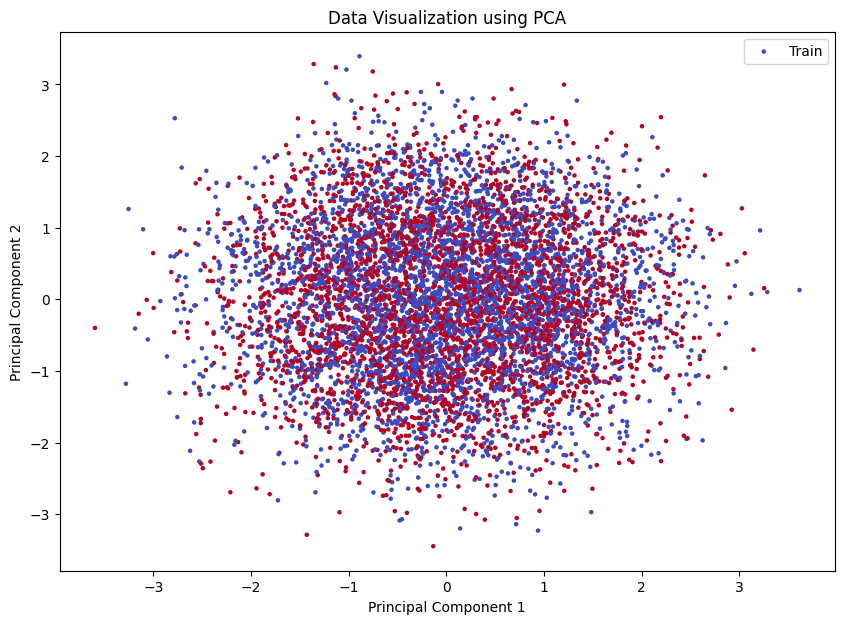

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(X)
valid_pca = pca.fit_transform(X_valid)

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='coolwarm', s=5, label='Train')
#plt.scatter(valid_pca[:, 0], valid_pca[:, 1], c=y_valid, cmap='viridis', s=5, label='Valid')
plt.title('Data Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

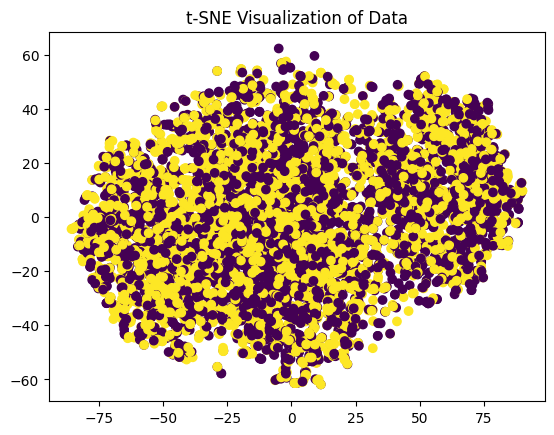

In [216]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization of Data')
plt.show()


In [218]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use a RandomForest classifier for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(rf, n_features_to_select=10)  # select top 10 features
selector = selector.fit(X, y)

# Get selected features
X_train_selected = selector.transform(X)
X_val_selected = selector.transform(X_valid)

print(f"Selected features shape: {X_train_selected.shape}")


Selected features shape: (7080, 10)
